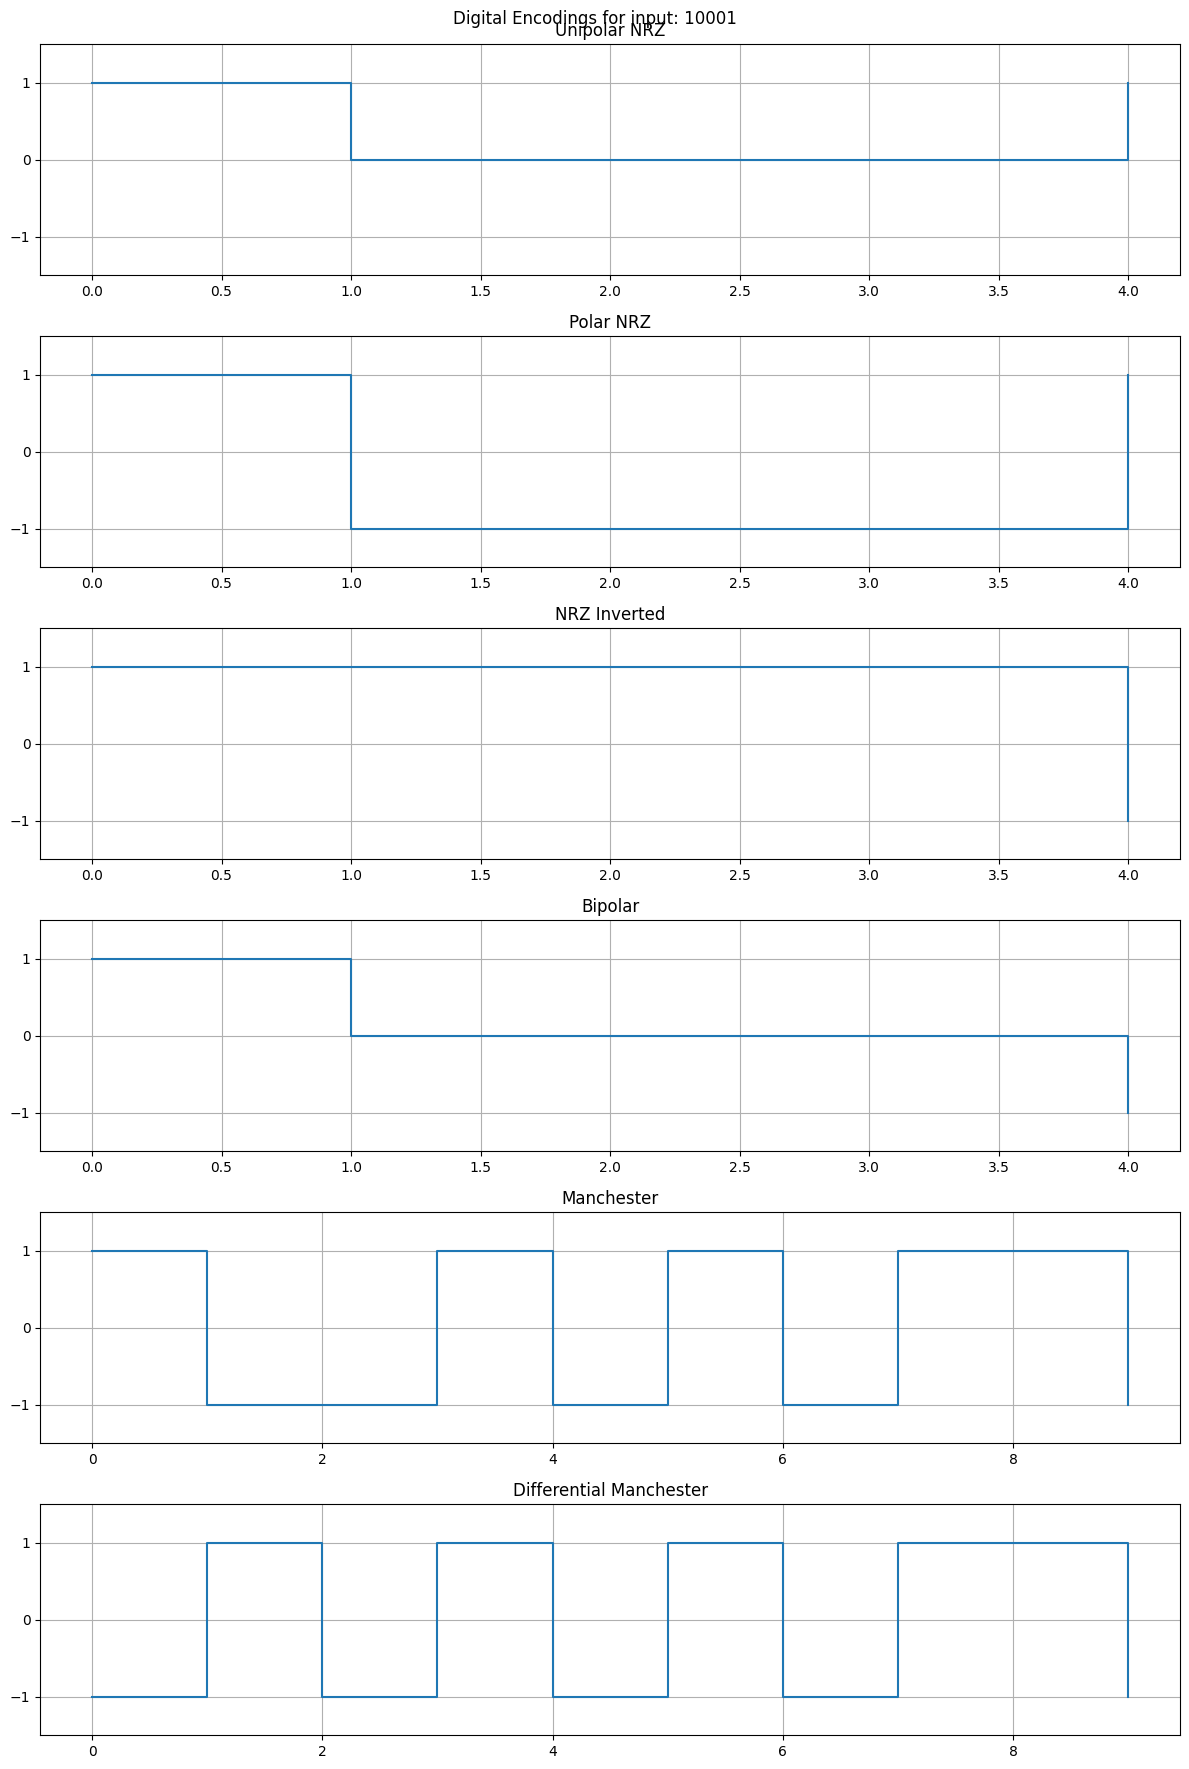

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def unipolar_nrz(bits):
    return [1 if bit == '1' else 0 for bit in bits]

def polar_nrz(bits):
    return [1 if bit == '1' else -1 for bit in bits]

def nrz_inverted(bits):
    signal = []
    level = -1
    for bit in bits:
        if bit == '1':
            level = -level
        signal.append(level)
    return signal

def bipolar(bits):
    signal = []
    level = 1
    for bit in bits:
        if bit == '1':
            signal.append(level)
            level = -level
        else:
            signal.append(0)
    return signal

def manchester(bits):
    signal = []
    for bit in bits:
        if bit == '1':
            signal.extend([1, -1])
        else:
            signal.extend([-1, 1])
    return signal

def differential_manchester(bits):
    signal = []
    level = 1
    for bit in bits:
        if bit == '0':
            signal.extend([level, -level])
        else:
            level = -level
            signal.extend([level, -level])
    return signal

def plot_encoding(bits):
    encodings = [
        ('Unipolar NRZ', unipolar_nrz(bits)),
        ('Polar NRZ', polar_nrz(bits)),
        ('NRZ Inverted', nrz_inverted(bits)),
        ('Bipolar', bipolar(bits)),
        ('Manchester', manchester(bits)),
        ('Differential Manchester', differential_manchester(bits))
    ]

    fig, axs = plt.subplots(len(encodings), 1, figsize=(12, 3*len(encodings)))
    fig.suptitle(f'Digital Encodings for input: {bits}')

    for i, (name, signal) in enumerate(encodings):
        t = np.arange(0, len(signal))
        axs[i].step(t, signal, where='post')
        axs[i].set_ylim(-1.5, 1.5)
        axs[i].set_title(name)
        axs[i].set_yticks([-1, 0, 1])
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# Interactive input
while True:
    user_input = input("Enter a binary sequence (or 'q' to quit): ")
    if user_input.lower() == 'q':
        break
    if set(user_input) <= {'0', '1'}:
        plot_encoding(user_input)
    else:
        print("Invalid input. Please enter only 0s and 1s.")
